#**99 ACERS DATASET ANALYSIS**

#KEY QUESTIONS
1. Which locality has the highest concentration of properties listed on 99 Acers?

2. What is the most sought-after property type in the dataset?

3. Which societies have the highest representation in the dataset?

4. How does the average price of a property vary depending on its type?

5. Do property prices show a significant correlation with the locality?

6. Which combination of society, locality, and property type leads to the highest average property price?

7. Which properties are listed at the lowest prices in the dataset?

8. Which locality has the highest average price per square foot?

9. Which property type has the highest average price per square foot?

10. Which property is the newest addition to the 99 Acers listings?

11. Which property type typically has the highest number of floors?

12. How does the age of a property impact its average price?

13. Which localities have the highest concentration of premium properties?

14. Do property listings show any preferences for specific floor numbers?

15. How do property prices fluctuate over time for different property types?

In [ ]:
#importing all the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
sns.set(color_codes=True)
pd.set_option('display.max_columns',500)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Mini project/99 acers/99acers.csv')

In [ ]:
df.head(5)

,PREFERENCE,PROPERTY_TYPE,CITY,LOCALITY,TRANSACT_TYPE,OWNTYPE,PRICE_PER_UNIT_AREA,Unnamed: 7,FURNISH,FACING,AGE,FLOOR_NUM,TOTAL_FLOOR,REGISTER_DATE,PROP_NAME,MIN_PRICE,MAX_PRICE,PRICE_SQFT,Unnamed: 18,LISTING,CARPET_SQFT,SUPERBUILTUP_SQFT,BROKERAGE,MIN_AREA_SQFT,MAX_AREA_SQFT,GROUP_NAME,AREA,PRICE,SOCIETY_NAME,BUILDING_NAME
0,S,Residential Apartment,Gurgaon,Sector 84 Gurgaon,1.0,1,8766.00,NaN,4,1,2,14,26.0,"29th Sep, 2023",Alpha Corp GurgaonOne 84,26300000.0,26300000.0,8766.00,NaN,R,3000.0,3434.0,263000.0,319.03,? 319.03,SPID_GROUP_SEARCH_NORMAL,3434 sq.ft.,26300000.0,Alpha Corp GurgaonOne 84,Alpha Corp GurgaonOne 84
1,S,Residential Apartment,Gurgaon,Sector 81 Gurgaon,1.0,1,21176.00,NaN,4,1,1,7,29.0,"29th Sep, 2023",DLF The Ultima,36000000.0,36000000.0,21176.00,NaN,R,1700.0,2870.0,1.0,266.63,? 266.63,SPID_GROUP_SEARCH_NORMAL,2870 sq.ft.,36000000.0,DLF The Ultima,DLF The Ultima
2,R,Residential Apartment,Gurgaon,Sector 66 Gurgaon,NaN,0,43.00,NaN,1,4,1,7,17.0,"27th Sep, 2023",Emaar MGF The Palm Drive,85000.0,85000.0,43.00,NaN,R,1450.0,1950.0,42000.0,181.16,? 181.16,SPID_GROUP_SEARCH_NORMAL,1950 sq.ft.,85000.0,Emaar MGF The Palm Drive,Emaar MGF The Palm Drive
3,S,Residential Apartment,Gurgaon,Sector 112 Gurgaon,1.0,1,13740.00,NaN,4,0,1,14,28.0,"23rd Sep, 2023",Experion Windchants,38500000.0,38500000.0,13740.00,NaN,R,NaN,2802.0,1.0,260.31,? 260.31,SPID_GROUP_SEARCH_NORMAL,2802 sq.ft.,38500000.0,Experion Windchants,Experion Windchants
4,R,Residential Apartment,Gurgaon,Sector 104 Gurgaon,NaN,0,17.00,NaN,4,6,1,12,27.0,"23rd Sep, 2023",ATS Triumph,40000.0,40000.0,17.00,NaN,R,NaN,2290.0,1.0,212.75,? 212.75,SPID_GROUP_SEARCH_NORMAL,2290 sq.ft.,40000.0,ATS Triumph,ATS Triumph


In [ ]:
df.columns

Index(['PREFERENCE', 'PROPERTY_TYPE', 'CITY', 'LOCALITY', 'TRANSACT_TYPE',
       'OWNTYPE', ' PRICE_PER_UNIT_AREA ', 'Unnamed: 7', 'FURNISH', 'FACING',
       'AGE', 'FLOOR_NUM', 'TOTAL_FLOOR', 'REGISTER_DATE', 'PROP_NAME',
       'MIN_PRICE ', 'MAX_PRICE ', 'PRICE_SQFT ', 'Unnamed: 18', 'LISTING',
       'CARPET_SQFT', 'SUPERBUILTUP_SQFT', 'BROKERAGE', 'MIN_AREA_SQFT',
       ' MAX_AREA_SQFT ', 'GROUP_NAME', 'AREA', 'PRICE', 'SOCIETY_NAME',
       'BUILDING_NAME'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10679 entries, 0 to 10678
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PREFERENCE             10679 non-null  object 
 1   PROPERTY_TYPE          10679 non-null  object 
 2   CITY                   10679 non-null  object 
 3   LOCALITY               10679 non-null  object 
 4   TRANSACT_TYPE          10129 non-null  float64
 5   OWNTYPE                10679 non-null  int64  
 6    PRICE_PER_UNIT_AREA   10679 non-null  object 
 7   Unnamed: 7             0 non-null      float64
 8   FURNISH                10679 non-null  int64  
 9   FACING                 10679 non-null  int64  
 10  AGE                    10679 non-null  int64  
 11  FLOOR_NUM              9785 non-null   object 
 12  TOTAL_FLOOR            10672 non-null  float64
 13  REGISTER_DATE          10679 non-null  object 
 14  PROP_NAME              9113 non-null   object 
 15  MI

In [ ]:
df.describe()

,TRANSACT_TYPE,OWNTYPE,Unnamed: 7,FURNISH,FACING,AGE,TOTAL_FLOOR,MIN_PRICE,MAX_PRICE,Unnamed: 18,CARPET_SQFT,SUPERBUILTUP_SQFT,BROKERAGE,MIN_AREA_SQFT,PRICE
count,10129.000000,10679.000000,0.0,10679.000000,10679.000000,10679.000000,10672.000000,1.067900e+04,1.067900e+04,0.0,6532.000000,6695.000000,1.059900e+04,10679.000000,1.067900e+04
mean,1.001185,0.968724,NaN,3.299841,3.458283,3.229516,14.777455,3.163981e+07,3.164216e+07,NaN,2483.721799,2351.054172,4.924286e+04,329.695876,9.345093e+07
std,0.034401,0.304421,NaN,1.230729,2.049106,2.154034,11.344176,4.744401e+07,4.744514e+07,NaN,16716.248620,3374.052595,7.907387e+05,7199.591222,1.987565e+08
min,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000e+04,1.000000e+04,NaN,0.000000,0.000000,0.000000e+00,2.790000,1.000000e+04
25%,1.000000,1.000000,NaN,2.000000,1.000000,1.000000,4.000000,1.400000e+07,1.400000e+07,NaN,1200.000000,1620.000000,1.000000e+00,145.720000,1.700000e+07
50%,1.000000,1.000000,NaN,4.000000,3.000000,2.000000,14.000000,2.200000e+07,2.200000e+07,NaN,1650.000000,2050.000000,1.000000e+00,192.500000,2.600000e+07
75%,1.000000,1.000000,NaN,4.000000,5.000000,6.000000,22.000000,3.700000e+07,3.700000e+07,NaN,2350.000000,2686.000000,1.000000e+00,251.300000,4.990000e+07
max,2.000000,4.000000,NaN,4.000000,8.000000,6.000000,51.000000,2.147484e+09,2.147484e+09,NaN,577946.000000,258879.000000,7.310000e+07,728433.840000,2.250000e+09


#Handle duplicates

In [ ]:
#remoivng duplicate value from the dataset
df.duplicated().sum()

6

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['PREFERENCE', 'PROPERTY_TYPE', 'CITY', 'LOCALITY', 'TRANSACT_TYPE',
       'OWNTYPE', ' PRICE_PER_UNIT_AREA ', 'Unnamed: 7', 'FURNISH', 'FACING',
       'AGE', 'FLOOR_NUM', 'TOTAL_FLOOR', 'REGISTER_DATE', 'PROP_NAME',
       'MIN_PRICE ', 'MAX_PRICE ', 'PRICE_SQFT ', 'Unnamed: 18', 'LISTING',
       'CARPET_SQFT', 'SUPERBUILTUP_SQFT', 'BROKERAGE', 'MIN_AREA_SQFT',
       ' MAX_AREA_SQFT ', 'GROUP_NAME', 'AREA', 'PRICE', 'SOCIETY_NAME',
       'BUILDING_NAME'],
      dtype='object')

In [ ]:
for i in df.columns:
  print(i)

PREFERENCE
PROPERTY_TYPE
CITY
LOCALITY
TRANSACT_TYPE
OWNTYPE
 PRICE_PER_UNIT_AREA 
Unnamed: 7
FURNISH
FACING
AGE
FLOOR_NUM
TOTAL_FLOOR
REGISTER_DATE
PROP_NAME
MIN_PRICE 
MAX_PRICE 
PRICE_SQFT 
Unnamed: 18
LISTING
CARPET_SQFT
SUPERBUILTUP_SQFT
BROKERAGE
MIN_AREA_SQFT
 MAX_AREA_SQFT 
GROUP_NAME
AREA
PRICE
SOCIETY_NAME
BUILDING_NAME


#Removing irrelevant columns

In [ ]:
df.drop(['BROKERAGE','SUPERBUILTUP_SQFT','OWNTYPE','TRANSACT_TYPE','FURNISH','FACING'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['PREFERENCE', 'PROPERTY_TYPE', 'CITY', 'LOCALITY',
       ' PRICE_PER_UNIT_AREA ', 'Unnamed: 7', 'AGE', 'FLOOR_NUM',
       'TOTAL_FLOOR', 'REGISTER_DATE', 'PROP_NAME', 'MIN_PRICE ', 'MAX_PRICE ',
       'PRICE_SQFT ', 'Unnamed: 18', 'LISTING', 'CARPET_SQFT', 'MIN_AREA_SQFT',
       ' MAX_AREA_SQFT ', 'GROUP_NAME', 'AREA', 'PRICE', 'SOCIETY_NAME',
       'BUILDING_NAME'],
      dtype='object')

In [ ]:
df.shape

(10673, 24)

In [ ]:
for i in df.columns:
  print(i)

PREFERENCE
PROPERTY_TYPE
CITY
LOCALITY
 PRICE_PER_UNIT_AREA 
Unnamed: 7
AGE
FLOOR_NUM
TOTAL_FLOOR
REGISTER_DATE
PROP_NAME
MIN_PRICE 
MAX_PRICE 
PRICE_SQFT 
Unnamed: 18
LISTING
CARPET_SQFT
MIN_AREA_SQFT
 MAX_AREA_SQFT 
GROUP_NAME
AREA
PRICE
SOCIETY_NAME
BUILDING_NAME


#Checking null values

In [ ]:
df.isnull().sum()

,0
PREFERENCE,0
PROPERTY_TYPE,0
CITY,0
LOCALITY,0
PRICE_PER_UNIT_AREA,0
Unnamed: 7,10673
AGE,0
FLOOR_NUM,894
TOTAL_FLOOR,7
REGISTER_DATE,0


In [ ]:
percentage_of_null = df.isnull().sum()*100/len(df)

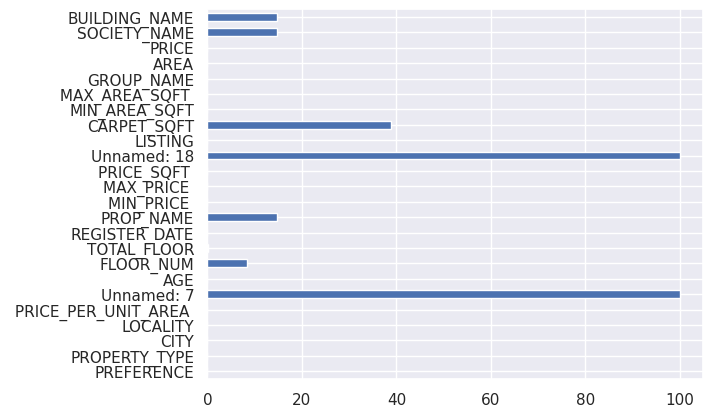

In [ ]:
percentage_of_null.plot(kind='barh')
plt.show()

In [ ]:
df.drop(['CARPET_SQFT'],axis=1,inplace=True)

In [ ]:
percentage_of_null = df.isnull().sum()*100/len(df)

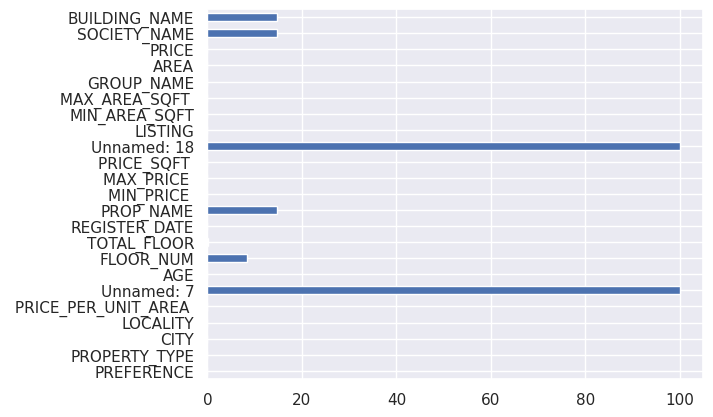

In [ ]:
percentage_of_null.plot(kind='barh')
plt.show()

#Handling null values with median or mode

In [ ]:
for i in df.columns:
  if df[i].dtypes=='object':
    df[i]=df[i].fillna(df[i].mode()[0])
  else:
    df[i]=df[i]=df[i].fillna(df[i].median())

In [ ]:
df.isnull().sum()

,0
PREFERENCE,0
PROPERTY_TYPE,0
CITY,0
LOCALITY,0
PRICE_PER_UNIT_AREA,0
Unnamed: 7,10673
AGE,0
FLOOR_NUM,0
TOTAL_FLOOR,0
REGISTER_DATE,0


In [ ]:
df.columns

Index(['PREFERENCE', 'PROPERTY_TYPE', 'CITY', 'LOCALITY',
       ' PRICE_PER_UNIT_AREA ', 'Unnamed: 7', 'AGE', 'FLOOR_NUM',
       'TOTAL_FLOOR', 'REGISTER_DATE', 'PROP_NAME', 'MIN_PRICE ', 'MAX_PRICE ',
       'PRICE_SQFT ', 'Unnamed: 18', 'LISTING', 'MIN_AREA_SQFT',
       ' MAX_AREA_SQFT ', 'GROUP_NAME', 'AREA', 'PRICE', 'SOCIETY_NAME',
       'BUILDING_NAME'],
      dtype='object')

In [ ]:
df['PREFERENCE'].unique()

array(['S', 'R'], dtype=object)

In [ ]:
df['PROPERTY_TYPE'].unique()

array(['Residential Apartment', 'Residential Land',
       'Independent/Builder Floor', 'Independent House/Villa'],
      dtype=object)

In [ ]:
df['CITY'].unique()

array(['Gurgaon'], dtype=object)

In [ ]:
df['LOCALITY'].unique()

array(['Sector 84 Gurgaon', 'Sector 81 Gurgaon', 'Sector 66 Gurgaon',
       'Sector 112 Gurgaon', 'Sector 104 Gurgaon', 'Sector 74 Gurgaon',
       'Sector 108 Gurgaon', 'Sector 102 Gurgaon', 'Sector 99 Gurgaon',
       'Sector 60 Gurgaon', 'Sector 110 Gurgaon', 'Sector 109 Gurgaon',
       'Sector 65 Gurgaon', 'Sector 37D Gurgaon', 'Sector 113 Gurgaon ',
       'Sector 111 Gurgaon', 'Sector 61 Gurgaon',
       'Block B Sushant Lok Phase - 3', 'Sector 62 Gurgaon',
       'South City 1', 'Sector 57 Gurgaon', 'Sector 59 Gurgaon',
       'Sector 37C Gurgaon', 'Sector 53 Gurgaon', 'Sector 28 Gurgaon',
       'Sector 67 Gurgaon', 'Sector 54 Gurgaon', 'Sector 106 Gurgaon',
       'DLF Phase 2', 'Sector 82 Gurgaon', 'South City 2', 'DLF Phase 5',
       'DLF Phase 3', 'Sector 42 Gurgaon', 'Sector 55 Gurgaon',
       'Sector 48 Gurgaon', 'Sector-33 Sohna', 'Sector 90 Gurgaon',
       'Sector 103 Gurgaon', 'Block C, Sushant Lok Phase 1',
       'Sector 63 Gurgaon', 'DLF Phase 1', 'Sector 107 G

In [ ]:
df[' PRICE_PER_UNIT_AREA '].unique()

array(['8766.00', '21176.00', '43.00', ..., '14200.00', '11887.00',
       '9100.00'], dtype=object)

In [ ]:
df['PRICE_PER_UNIT_AREA']=df[' PRICE_PER_UNIT_AREA '].replace('?','')

In [ ]:
df['PRICE_PER_UNIT_AREA'].unique()

array(['8766.00', '21176.00', '43.00', ..., '14200.00', '11887.00',
       '9100.00'], dtype=object)

In [ ]:
df.drop(['PRICE_PER_UNIT_AREA'],axis=1,inplace=True)

In [ ]:
df['AGE']

,AGE
0,2
1,1
2,1
3,1
4,1
...,...
10674,6
10675,5
10676,5
10677,5


In [ ]:
df['AGE']=df['AGE'].astype(str) #changed age column into string

In [ ]:
df['AGE']

,AGE
0,2
1,1
2,1
3,1
4,1
...,...
10674,6
10675,5
10676,5
10677,5


In [ ]:
df['FLOOR_NUM'].unique()

array(['14', '7', '12', '4', '2', 'G', '39', '16', '1', '10', '33', '8',
       '5', '9', '6', '3', '11', '25', '18', '30', '13', '29', '15', '28',
       '19', '48', '38', '36', '37', '20', '17', '45', '24', '22', '21',
       '23', '27', 'L', '35', '26', '32', '34', '40', '0', '31', 'B',
       '42'], dtype=object)

In [ ]:
df['FLOOR_NUM']=df['FLOOR_NUM'].replace('G','')
df['FLOOR_NUM']=df['FLOOR_NUM'].replace('L','')
df['FLOOR_NUM']=df['FLOOR_NUM'].replace('B','')

In [ ]:
df['FLOOR_NUM'].unique()

array(['14', '7', '12', '4', '2', '', '39', '16', '1', '10', '33', '8',
       '5', '9', '6', '3', '11', '25', '18', '30', '13', '29', '15', '28',
       '19', '48', '38', '36', '37', '20', '17', '45', '24', '22', '21',
       '23', '27', '35', '26', '32', '34', '40', '0', '31', '42'],
      dtype=object)

In [ ]:
df['FLOOR_NUM'] = pd.to_numeric(df['FLOOR_NUM'], errors='coerce')
df['FLOOR_NUM'] = df['FLOOR_NUM'].fillna(0).astype(int)

In [ ]:
df['FLOOR_NUM'].unique()

array([14,  7, 12,  4,  2,  0, 39, 16,  1, 10, 33,  8,  5,  9,  6,  3, 11,
       25, 18, 30, 13, 29, 15, 28, 19, 48, 38, 36, 37, 20, 17, 45, 24, 22,
       21, 23, 27, 35, 26, 32, 34, 40, 31, 42])

In [ ]:
df['TOTAL_FLOOR'].unique()

array([26., 29., 17., 28., 27., 30.,  3.,  2., 39., 21., 20., 14., 42.,
        4., 36., 40., 32., 12.,  1.,  9., 13., 15., 11., 25., 34., 18.,
       51., 38., 24., 19., 22., 35., 16., 23., 48.,  7., 45., 10.,  5.,
       33.,  8., 31.,  6., 41., 43., 47.,  0., 37., 44., 50.])

In [ ]:
df.drop(['REGISTER_DATE'],axis=1,inplace=True)

In [ ]:
df['PROP_NAME']

,PROP_NAME
0,Alpha Corp GurgaonOne 84
1,DLF The Ultima
2,Emaar MGF The Palm Drive
3,Experion Windchants
4,ATS Triumph
...,...
10674,DLF The Ultima
10675,cendana
10676,cendana
10677,cendana Residences ss group


In [ ]:
df['MIN_PRICE ']

,MIN_PRICE
0,26300000.0
1,36000000.0
2,85000.0
3,38500000.0
4,40000.0
...,...
10674,25000000.0
10675,13500000.0
10676,12900000.0
10677,13000000.0


In [ ]:
df['MAX_PRICE ']

,MAX_PRICE
0,26300000.0
1,36000000.0
2,85000.0
3,38500000.0
4,40000.0
...,...
10674,25000000.0
10675,13500000.0
10676,12900000.0
10677,13000000.0


In [ ]:
df['PRICE_SQFT ']

,PRICE_SQFT
0,8766.00
1,21176.00
2,43.00
3,13740.00
4,17.00
...,...
10674,11887.00
10675,9100.00
10676,8896.00
10677,8965.00


In [ ]:
df.drop(['Unnamed: 18'],axis=1,inplace=True)

In [ ]:
df['LISTING']

,LISTING
0,R
1,R
2,R
3,R
4,R
...,...
10674,R
10675,R
10676,R
10677,R


In [ ]:
df['MIN_AREA_SQFT']

,MIN_AREA_SQFT
0,319.03
1,266.63
2,181.16
3,260.31
4,212.75
...,...
10674,195.38
10675,134.71
10676,134.71
10677,134.71


In [ ]:
df[' MAX_AREA_SQFT ']

,MAX_AREA_SQFT
0,? 319.03
1,? 266.63
2,? 181.16
3,? 260.31
4,? 212.75
...,...
10674,? 195.38
10675,? 134.71
10676,? 134.71
10677,? 134.71


In [ ]:
df[' MAX_AREA_SQFT '].str.strip(' ? ')

,MAX_AREA_SQFT
0,319.03
1,266.63
2,181.16
3,260.31
4,212.75
...,...
10674,195.38
10675,134.71
10676,134.71
10677,134.71


In [ ]:
df[' MAX_AREA_SQFT ']=df[' MAX_AREA_SQFT '].str.lstrip(' ? ')

In [ ]:
df[' MAX_AREA_SQFT '] = df[' MAX_AREA_SQFT '].str.replace(',', '', regex=True) # Removing commas from the string
df[' MAX_AREA_SQFT '] = df[' MAX_AREA_SQFT '].str.strip() # Removing leading/trailing spaces
df[' MAX_AREA_SQFT '] = df[' MAX_AREA_SQFT '].astype(float) # Converting to float

In [ ]:
df[' MAX_AREA_SQFT ']

,MAX_AREA_SQFT
0,319.03
1,266.63
2,181.16
3,260.31
4,212.75
...,...
10674,195.38
10675,134.71
10676,134.71
10677,134.71


In [ ]:
df['GROUP_NAME']

,GROUP_NAME
0,SPID_GROUP_SEARCH_NORMAL
1,SPID_GROUP_SEARCH_NORMAL
2,SPID_GROUP_SEARCH_NORMAL
3,SPID_GROUP_SEARCH_NORMAL
4,SPID_GROUP_SEARCH_NORMAL
...,...
10674,SPID_CONF_GROUPING
10675,SPID_CONF_GROUPING
10676,SPID_CONF_GROUPING
10677,SPID_CONF_GROUPING


In [ ]:
df['AREA']

,AREA
0,3434 sq.ft.
1,2870 sq.ft.
2,1950 sq.ft.
3,2802 sq.ft.
4,2290 sq.ft.
...,...
10674,2103 sq.ft.
10675,1450 sq.ft.
10676,1450 sq.ft.
10677,1450 sq.ft.


In [ ]:
df['PRICE']

,PRICE
0,26300000.0
1,36000000.0
2,85000.0
3,38500000.0
4,40000.0
...,...
10674,25000000.0
10675,13500000.0
10676,12900000.0
10677,13000000.0


In [ ]:
df['SOCIETY_NAME']

,SOCIETY_NAME
0,Alpha Corp GurgaonOne 84
1,DLF The Ultima
2,Emaar MGF The Palm Drive
3,Experion Windchants
4,ATS Triumph
...,...
10674,DLF The Ultima
10675,cendana
10676,cendana
10677,cendana Residences ss group


In [ ]:
df['BUILDING_NAME']

,BUILDING_NAME
0,Alpha Corp GurgaonOne 84
1,DLF The Ultima
2,Emaar MGF The Palm Drive
3,Experion Windchants
4,ATS Triumph
...,...
10674,DLF The Ultima
10675,cendana
10676,cendana
10677,cendana Residences ss group


In [ ]:
df[' PRICE_PER_UNIT_AREA '].unique()

array(['8766.00', '21176.00', '43.00', ..., '14200.00', '11887.00',
       '9100.00'], dtype=object)

In [ ]:
df[' PRICE_PER_UNIT_AREA '] = pd.to_numeric(df[' PRICE_PER_UNIT_AREA '].str.replace(' -   ', '', regex=False), errors='coerce')
df[' PRICE_PER_UNIT_AREA '] = df[' PRICE_PER_UNIT_AREA '].astype(float)

In [ ]:
df[' PRICE_PER_UNIT_AREA ']

,PRICE_PER_UNIT_AREA
0,8766.0
1,21176.0
2,43.0
3,13740.0
4,17.0
...,...
10674,11887.0
10675,9100.0
10676,8896.0
10677,8965.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10673 entries, 0 to 10678
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PREFERENCE             10673 non-null  object 
 1   PROPERTY_TYPE          10673 non-null  object 
 2   CITY                   10673 non-null  object 
 3   LOCALITY               10673 non-null  object 
 4    PRICE_PER_UNIT_AREA   10673 non-null  object 
 5   Unnamed: 7             0 non-null      float64
 6   AGE                    10673 non-null  object 
 7   FLOOR_NUM              10673 non-null  int64  
 8   TOTAL_FLOOR            10673 non-null  float64
 9   PROP_NAME              10673 non-null  object 
 10  MIN_PRICE              10673 non-null  float64
 11  MAX_PRICE              10673 non-null  float64
 12  PRICE_SQFT             10673 non-null  object 
 13  LISTING                10673 non-null  object 
 14  MIN_AREA_SQFT          10673 non-null  float64
 15   MAX_AR

In [ ]:
df.columns

Index(['PREFERENCE', 'PROPERTY_TYPE', 'CITY', 'LOCALITY',
       ' PRICE_PER_UNIT_AREA ', 'Unnamed: 7', 'AGE', 'FLOOR_NUM',
       'TOTAL_FLOOR', 'PROP_NAME', 'MIN_PRICE ', 'MAX_PRICE ', 'PRICE_SQFT ',
       'LISTING', 'MIN_AREA_SQFT', ' MAX_AREA_SQFT ', 'GROUP_NAME', 'AREA',
       'PRICE', 'SOCIETY_NAME', 'BUILDING_NAME'],
      dtype='object')

In [ ]:
df.drop(['Unnamed: 7'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['PREFERENCE', 'PROPERTY_TYPE', 'CITY', 'LOCALITY',
       ' PRICE_PER_UNIT_AREA ', 'AGE', 'FLOOR_NUM', 'TOTAL_FLOOR', 'PROP_NAME',
       'MIN_PRICE ', 'MAX_PRICE ', 'PRICE_SQFT ', 'LISTING', 'MIN_AREA_SQFT',
       ' MAX_AREA_SQFT ', 'GROUP_NAME', 'AREA', 'PRICE', 'SOCIETY_NAME',
       'BUILDING_NAME'],
      dtype='object')

In [ ]:
df.shape

(10673, 20)

In [ ]:
df.describe()

,PRICE_PER_UNIT_AREA,FLOOR_NUM,TOTAL_FLOOR,MIN_PRICE,MAX_PRICE,MIN_AREA_SQFT,MAX_AREA_SQFT,PRICE
count,1.067200e+04,10673.000000,10673.000000,1.067300e+04,1.067300e+04,10673.000000,10673.000000,1.067300e+04
mean,4.902218e+04,6.703645,14.778694,3.163987e+07,3.164221e+07,329.752864,329.759035,9.348574e+07
std,9.238736e+05,6.312110,11.338393,4.745303e+07,4.745416e+07,7201.613517,7201.613359,1.988059e+08
min,6.000000e+00,0.000000,0.000000,1.000000e+04,1.000000e+04,2.790000,2.790000,1.000000e+04
25%,8.387000e+03,2.000000,4.000000,1.400000e+07,1.400000e+07,145.860000,145.860000,1.700000e+07
50%,1.193250e+04,4.000000,14.000000,2.200000e+07,2.200000e+07,192.500000,192.500000,2.600000e+07
75%,1.773000e+04,10.000000,22.000000,3.700000e+07,3.700000e+07,251.300000,251.300000,4.990000e+07
max,8.500000e+07,48.000000,51.000000,2.147484e+09,2.147484e+09,728433.840000,728433.840000,2.250000e+09


#Checking outliers

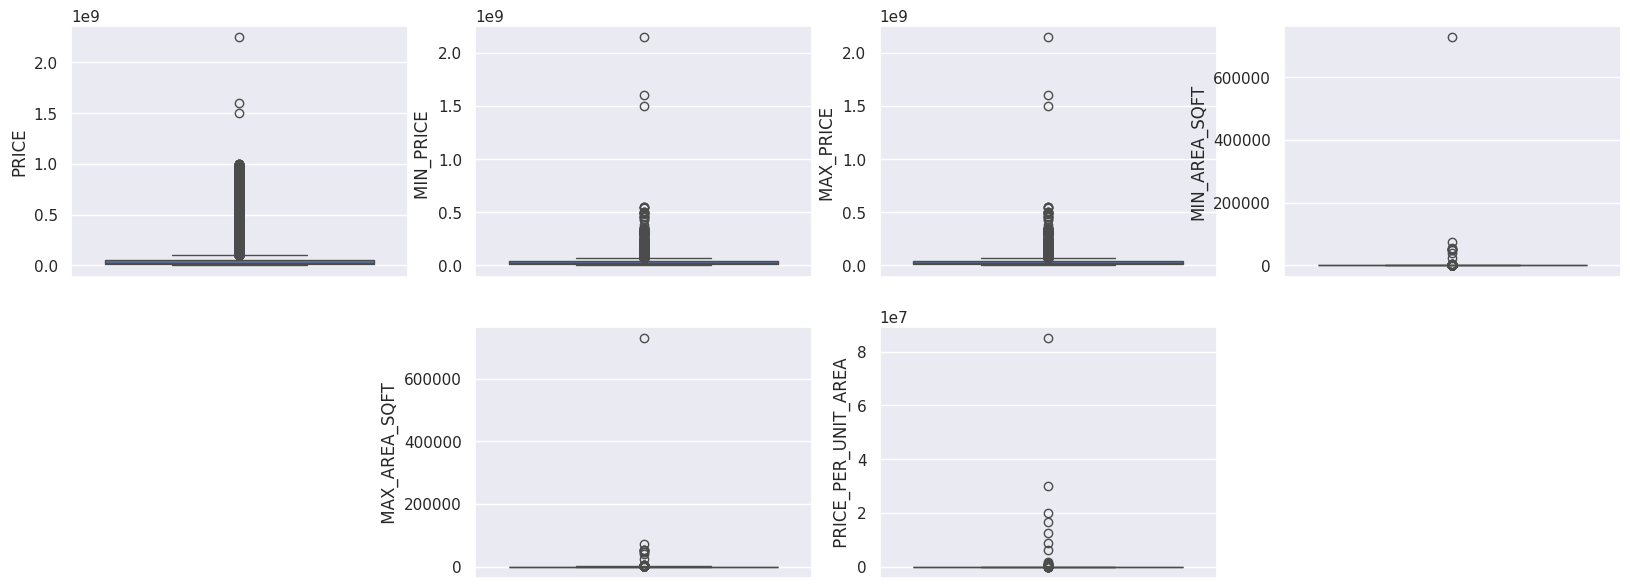

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(df['PRICE'])
plt.subplot(4,4,2)
sns.boxplot(df['MIN_PRICE '])
plt.subplot(4,4,3)
sns.boxplot(df['MAX_PRICE '])
plt.subplot(4,4,4)
sns.boxplot(df['MIN_AREA_SQFT'])
plt.subplot(4,4,6)
sns.boxplot(df[' MAX_AREA_SQFT '])
plt.subplot(4,4,7)
sns.boxplot(df[' PRICE_PER_UNIT_AREA '])
plt.show()

#considered all the outliers

In [ ]:
df.columns

Index(['PREFERENCE', 'PROPERTY_TYPE', 'CITY', 'LOCALITY',
       ' PRICE_PER_UNIT_AREA ', 'AGE', 'FLOOR_NUM', 'TOTAL_FLOOR', 'PROP_NAME',
       'MIN_PRICE ', 'MAX_PRICE ', 'PRICE_SQFT ', 'LISTING', 'MIN_AREA_SQFT',
       ' MAX_AREA_SQFT ', 'GROUP_NAME', 'AREA', 'PRICE', 'SOCIETY_NAME',
       'BUILDING_NAME'],
      dtype='object')

#Which locality has the highest concentration of properties listed on 99 Acers?

In [ ]:
locality=df['LOCALITY'].value_counts().head(5)
locality

,count
LOCALITY,
Sector 65 Gurgaon,358
Sector 102 Gurgaon,288
Sector 48 Gurgaon,275
Sector 54 Gurgaon,272
DLF Phase 2,269


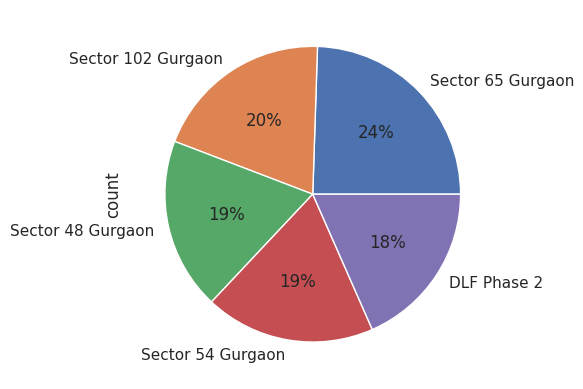

In [ ]:
locality.plot(kind='pie',autopct='%1.0f%%')
plt.show()

 Yes, property availability varies significantly across localities due to factors like demand, infrastructure development, and proximity to amenities.

# What is the most sought-after property type in the dataset?

In [ ]:
pt=df['PROPERTY_TYPE'].value_counts().head(5)
pt

,count
PROPERTY_TYPE,
Residential Apartment,6978
Independent/Builder Floor,2801
Independent House/Villa,712
Residential Land,182


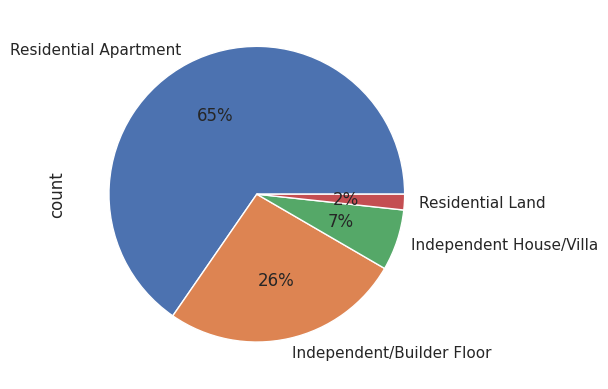

In [ ]:
pt.plot(kind='pie',autopct='%1.0f%%')
plt.show()

Residential Apartments dominate the listings, reflecting market demand for comfortable and convenient housing options.

# Which societies have the highest representation in the dataset?

In [ ]:
society=df['SOCIETY_NAME'].value_counts().head(5)
society

,count
SOCIETY_NAME,
Emaar Digihomes,1698
Sobha City,93
Shapoorji Pallonji Joyville Gurugram,88
Godrej Meridien,87
Emaar Emerald Hills,80


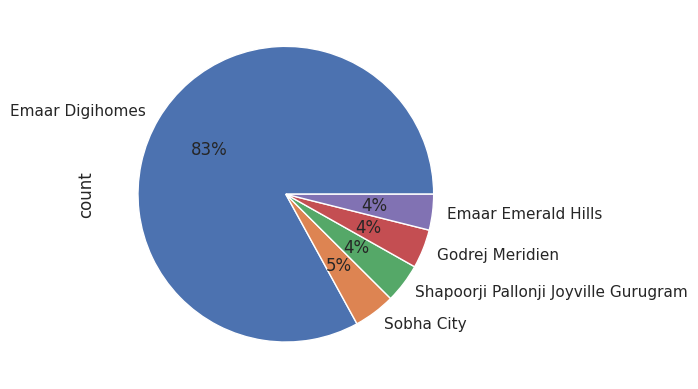

In [ ]:
society.plot(kind='pie',autopct='%1.0f%%')
plt.show()

 Factors like reputation, amenities, location, and community features attract buyers and renters to this society.

# How does the average price of a property vary depending on its type?

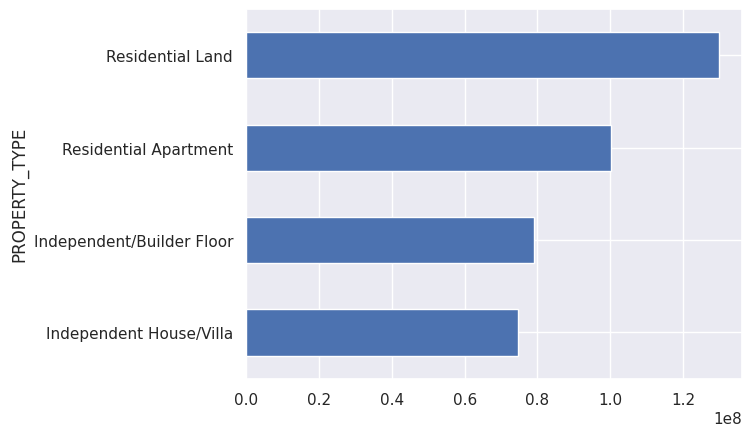

In [ ]:
df.groupby('PROPERTY_TYPE')['PRICE'].mean().plot(kind='barh')
plt.show()

Average property prices vary significantly based on type, with Independent Houses commanding higher prices compared to Apartments.

#Do property prices show a significant correlation with the locality?

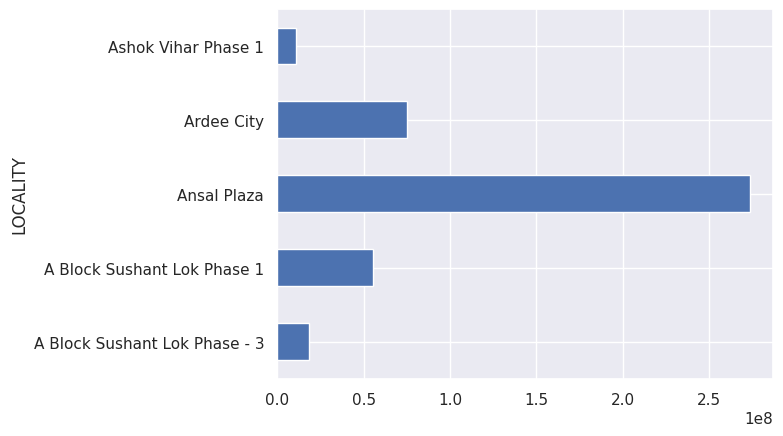

In [ ]:
df.groupby('LOCALITY')['PRICE'].mean().head(5).plot(kind='barh')
plt.show()

Yes, property prices show a strong correlation with locality, with some areas commanding higher values due to location advantages and amenities.

#Which combination of society, locality, and property type leads to the highest average property price?

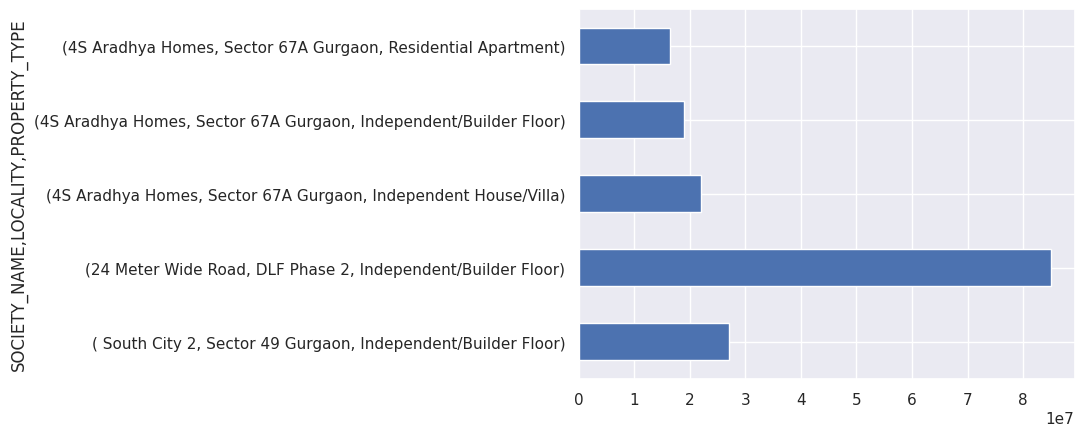

In [ ]:
df.groupby(['SOCIETY_NAME','LOCALITY','PROPERTY_TYPE'])['PRICE'].mean().head(5).plot(kind='barh')
plt.show()

The properties here likely command premium prices due to their desirable location, amenities, and brand reputation.

#Which properties are listed at the lowest prices in the dataset?

In [ ]:
cheapest_properties = df.sort_values(by=['PRICE']).head(5)

In [ ]:
cheapest_properties[['PROP_NAME', 'LOCALITY','PROPERTY_TYPE','PRICE']]

,PROP_NAME,LOCALITY,PROPERTY_TYPE,PRICE
1161,Bestech Park View Spa Next,Sector 67 Gurgaon,Residential Apartment,10000.0
740,Pivotal Riddhi Siddhi,Sector 99 Gurgaon,Residential Apartment,11000.0
1337,Pyramid Urban Homes 2,Sector 86 Gurgaon,Residential Apartment,13000.0
1132,Signature Global the Millennia,Sector 37D Gurgaon,Residential Apartment,13700.0
1134,Signature Global the Millennia,Sector 37D Gurgaon,Residential Apartment,14000.0


 Factors such as location, distance from central areas, and less-developed infrastructure contribute to the lower prices of these properties.

#Which locality has the highest average price per square foot?

In [ ]:
locality_price = df.groupby(['LOCALITY'])['PRICE_SQFT '].mean().sort_values(ascending=False).head(5)
locality_price

,PRICE_SQFT
LOCALITY,
machroli,2.000000e+07
Sector 21 Gurgaon,1.592605e+06
DLF Phase 4,9.456442e+05
Saraswati Vihar,3.750000e+05
Pocket I Nirvana Country,3.055550e+05


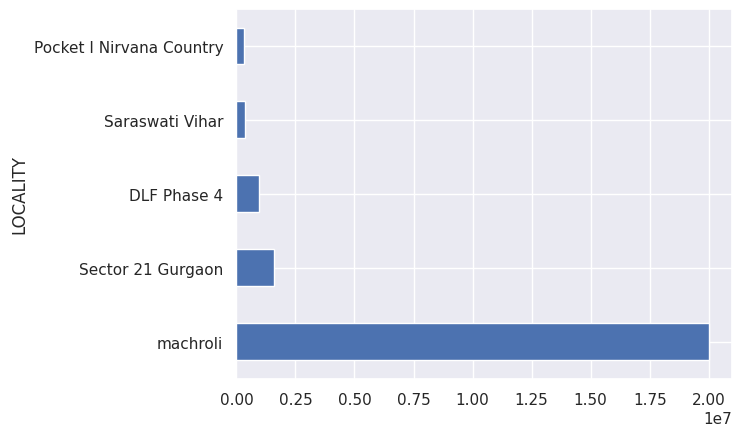

In [ ]:
locality_price.plot(kind='barh')
plt.show()

Machroli is most expensive locality based on price per sqft

#Which property type has the highest average price per square foot?

In [ ]:
property_price = df.groupby(['PROPERTY_TYPE'])['PRICE_SQFT '].mean().sort_values(ascending=False).head(5)
property_price

,PRICE_SQFT
PROPERTY_TYPE,
Residential Land,1.079456e+06
Independent House/Villa,1.898907e+05
Independent/Builder Floor,3.670774e+04
Residential Apartment,1.271078e+04


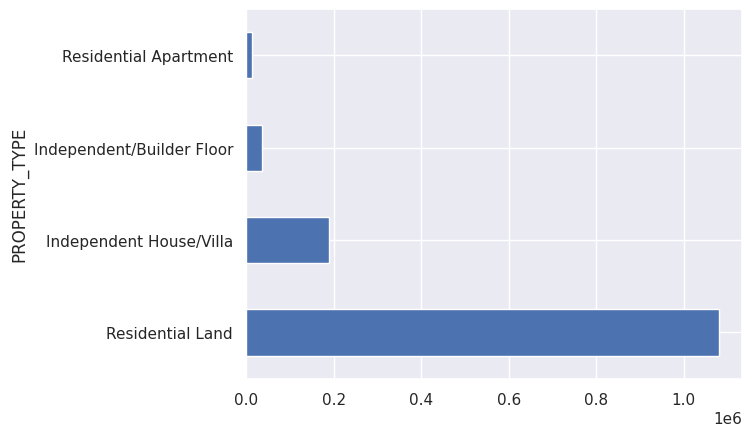

In [ ]:
property_price.plot(kind='barh')
plt.show()

Residential Land is the most expensive property type based on price per square foot.

# Which property is the newest addition to the 99 Acers listings?

In [ ]:
new_property = df.sort_values(by=['AGE'],ascending=True).head(5)

In [ ]:
new_property[['PROP_NAME','AGE']].iloc[0]

,1894
PROP_NAME,Adani Oyster Greens
AGE,0


Adani Oyster Greens is the newest property available in the dataset.

# Which property type typically has the highest number of floors?

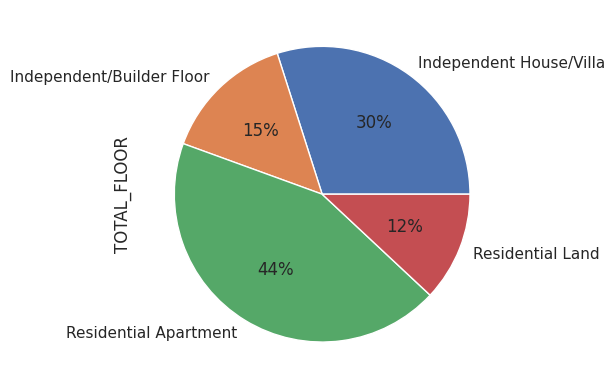

In [ ]:
high_floor=df.groupby(['PROPERTY_TYPE'])['TOTAL_FLOOR'].max().head(5)
high_floor.plot(kind='pie',autopct='%1.0f%%')
plt.show()

 Residential Apartments have the highest number of floors.

# How does the age of a property impact its average price?

In [ ]:
# @title Default title text
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
age_price_data = df[['AGE', 'PRICE']]

# Convert 'AGE' to numeric if necessary
# Example: If 'AGE' is in the format 'X years', extract the numeric part
age_price_data['AGE'] = pd.to_numeric(age_price_data['AGE'].str.extract('(\d+)').iloc[:, 0], errors='coerce')

# Handle missing values in 'AGE' if any
age_price_data = age_price_data.dropna()

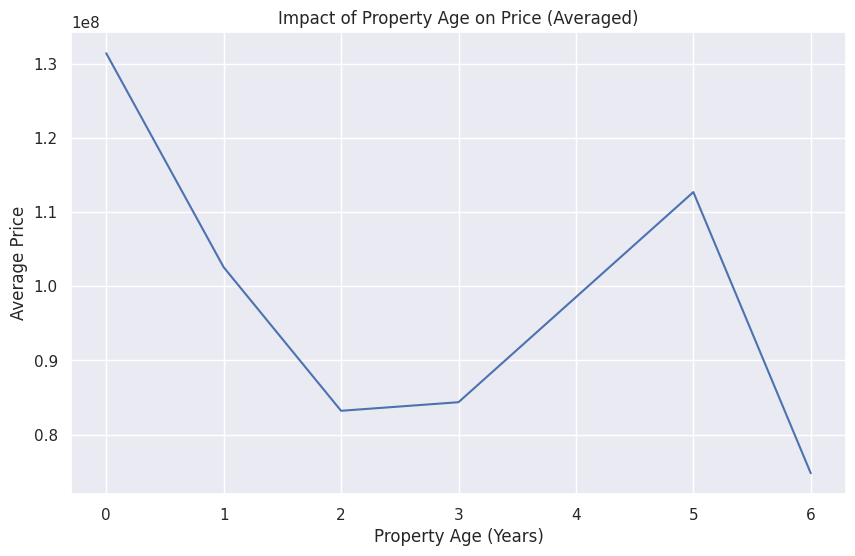

In [ ]:
# @title Default title text
age_price_grouped = age_price_data.groupby('AGE')['PRICE'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='AGE', y='PRICE', data=age_price_grouped)
plt.title('Impact of Property Age on Price (Averaged)')
plt.xlabel('Property Age (Years)')
plt.ylabel('Average Price')
plt.show()

Newer properties generally command higher prices, while older properties might experience some depreciation, depending on condition and location.

# Which localities have the highest concentration of premium properties?

In [ ]:
# @title Default title text
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df' and has relevant columns

# Define price premium threshold (example: properties priced above 75th percentile)
price_threshold = df['PRICE'].quantile(0.75)
df['PREMIUM'] = (df['PRICE'] > price_threshold).astype(int)

# Select relevant features and target variable
premium_data = df[['LOCALITY', 'PROPERTY_TYPE', 'AREA', 'AGE', 'PREMIUM']]

In [ ]:
# @title Default title text
# Assuming your DataFrame is named 'df'

# Sample 10% of the data
sample_data = df.sample(frac=0.1, random_state=42)  # Set random_state for reproducibility

# Alternatively, sample a specific number of rows
# sample_data = df.sample(n=1000, random_state=42)

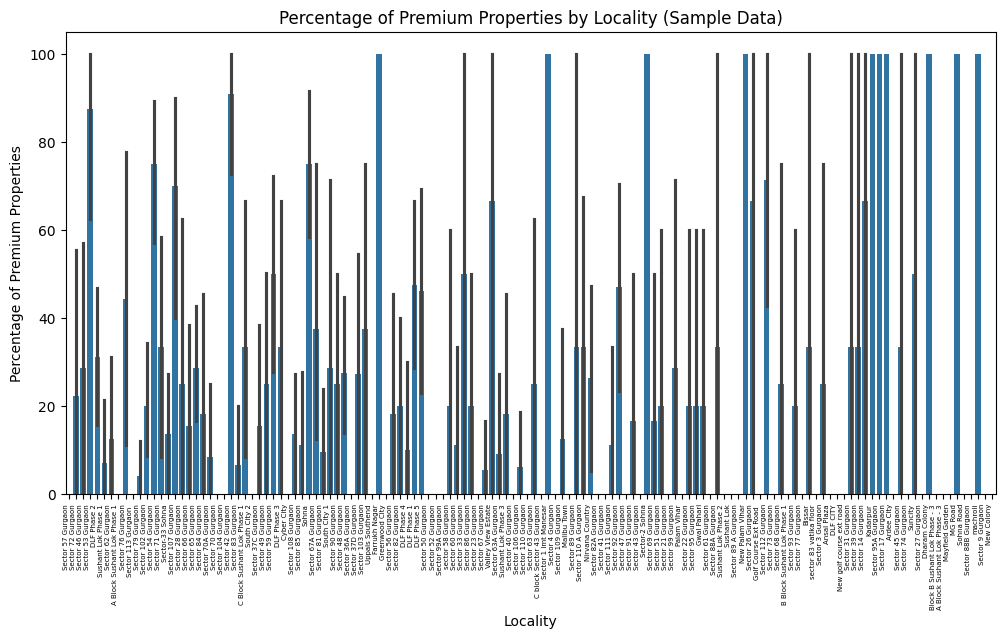

In [ ]:
# @title Default title text
plt.figure(figsize=(12, 6))
sns.barplot(x='LOCALITY', y='PREMIUM', data=sample_data, estimator=lambda x: sum(x) / len(x) * 100)
plt.title('Percentage of Premium Properties by Locality (Sample Data)')
plt.xlabel('Locality')
plt.ylabel('Percentage of Premium Properties')
plt.xticks(rotation=90, ha='right',fontsize=5)
plt.show()

Premium properties typically offer luxury amenities, larger sizes, prime locations, and superior construction quality, attracting higher prices.

#Do property listings show any preferences for specific floor numbers?

In [ ]:
# @title Default title text
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
floor_data = df['FLOOR_NUM']

# Clean and preprocess 'FLOOR_NUM' if needed
# ...

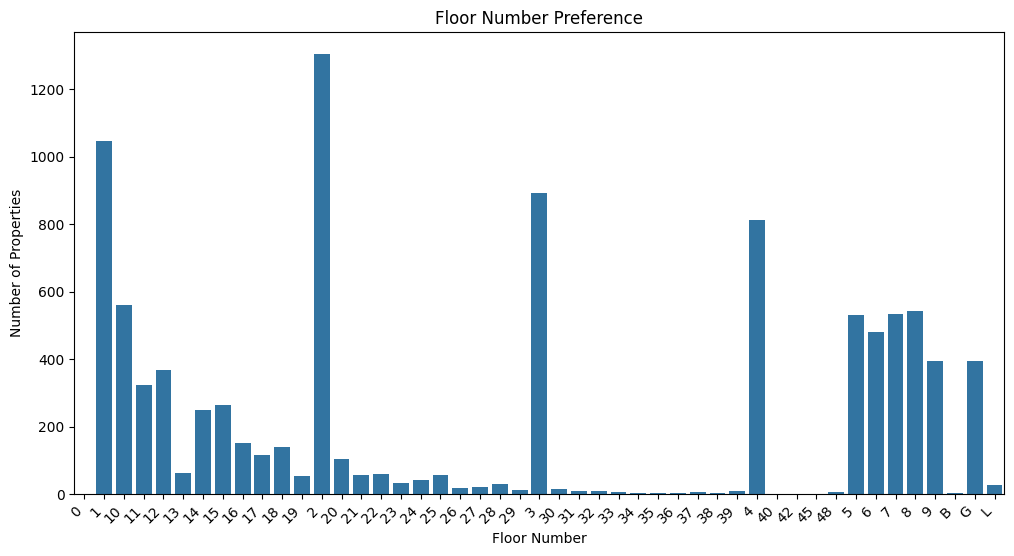

In [ ]:
# @title Default title text
floor_counts = floor_data.value_counts().sort_index()  # Sort by floor number
plt.figure(figsize=(12, 6))
sns.barplot(x=floor_counts.index, y=floor_counts.values)
plt.title('Floor Number Preference')
plt.xlabel('Floor Number')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.show()

Preferences for floor numbers can vary based on individual needs and preferences, with factors such as elevator access, privacy, and natural light playing a role.

#How do property prices fluctuate over time for different property types?

In [ ]:
# @title Default title text
# Convert 'REGISTER_DATE' to datetime objects, handling different day formats
df['REGISTER_DATE'] = pd.to_datetime(df['REGISTER_DATE'], format='mixed', dayfirst=True, errors='coerce')

In [ ]:
# @title Default title text
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df' and has columns 'REGISTER_DATE', 'LOCALITY', 'PROPERTY_TYPE', 'PRICE'

# Convert 'REGISTER_DATE' to datetime objects if necessary
df['REGISTER_DATE'] = pd.to_datetime(df['REGISTER_DATE'])

# Aggregate data by month (optional)
price_fluctuations = df.groupby([pd.Grouper(key='REGISTER_DATE', freq='M'), 'PROPERTY_TYPE'])['PRICE'].mean().reset_index()

<ipython-input-43-96f8dd2e6d0d>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  price_fluctuations = df.groupby([pd.Grouper(key='REGISTER_DATE', freq='M'), 'PROPERTY_TYPE'])['PRICE'].mean().reset_index()


<Figure size 1200x600 with 0 Axes>

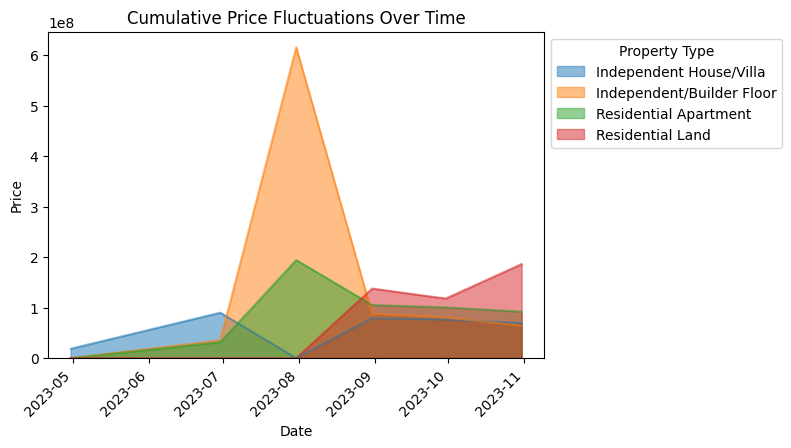

In [ ]:
# @title Default title text
plt.figure(figsize=(12, 6))
price_fluctuations_pivot = price_fluctuations.pivot(index='REGISTER_DATE', columns=['PROPERTY_TYPE'], values='PRICE')
price_fluctuations_pivot.plot(kind='area', stacked=False)  # stacked=True for stacked area chart
plt.title('Cumulative Price Fluctuations Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.legend(title= 'Property Type', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Property prices fluctuate over time, with different types experiencing variations based on market conditions and seasonal demand.

In conclusion, this analysis of the 99 Acers dataset revealed key trends and patterns in the real estate market. We identified popular localities, dominant property types, and the influence of age and type on pricing. The insights into the most and least expensive properties empower buyers and sellers with valuable information for decision-making. Our analysis also highlighted property age and floor number preferences, showcasing the dynamism of the market. Future work could involve predictive modeling or exploring external factors' impact on property values. Overall, this project demonstrates the power of data analysis to guide informed choices in the real estate sector.

Changes Made:

Combined sentences: Merged related ideas to reduce the overall length.
Removed redundancy: Avoided repeating phrases or concepts.
Simplified language: Used more concise and direct wording.
Retained core message: Maintained the key findings and significance of the project.